In [1]:
import pandas as pd
import seaborn as sns

,epoch,name,generator loss
3,1,FreezeD 2,0.855156
4,1,FreezeD 4,0.893517
5,1,No FreezeD,1.010189


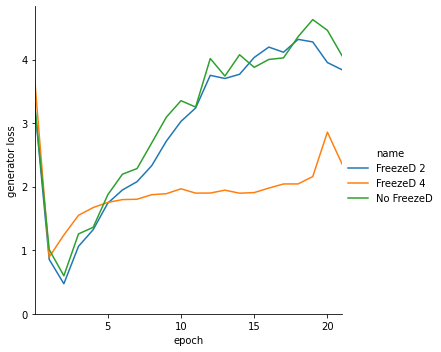

In [20]:
PATH = "results/freezeD/generator_loss_wgan.json"
METRIC = "generator loss"
OUTPUT = "results/freezeD/generator_loss_wgan.pdf"

data = pd.read_json(PATH).replace({"[wgan] dg3 freeze2": "FreezeD 2", "[wgan] freezeD4 dg3": "FreezeD 4", "[wgan] nofreeze dg3": "No FreezeD"})
data = data.explode(["x", "y"]).groupby(["x", "name"], as_index=False)["y"].mean()
data = data.rename(columns={"x": "epoch", "y": METRIC})

g = sns.relplot(data=data, x="epoch", y=METRIC, hue="name", kind="line", estimator=None)
g.ax.set_xmargin(0)
g.ax.set_xticks([5, 10, 15, 20])
g.ax.set_yticks([0, 1, 2, 3, 4])
g.savefig(OUTPUT)
data[data["epoch"] == 1]